In [2]:
n = 10
alpha = 0.05
A = qnorm(1-alpha, mean = 5, sd = 1/sqrt(n))
A

[1] 5.520148

In [4]:
# Probabilidad de error de tipo II
P = pnorm(A, mean=5.2, sd=1/sqrt(10))

[1] 0.8443261

In [5]:
# si voy corriendo la curva a la derecha, achico la P(error tipo II) y agrando la POTENCIA
pnorm(A, mean=5.5, sd=1/sqrt(10))

[1] 0.5254013

In [6]:
pnorm(A, mean=6, sd=1/sqrt(10))

[1] 0.06457983

[1] 5.520148

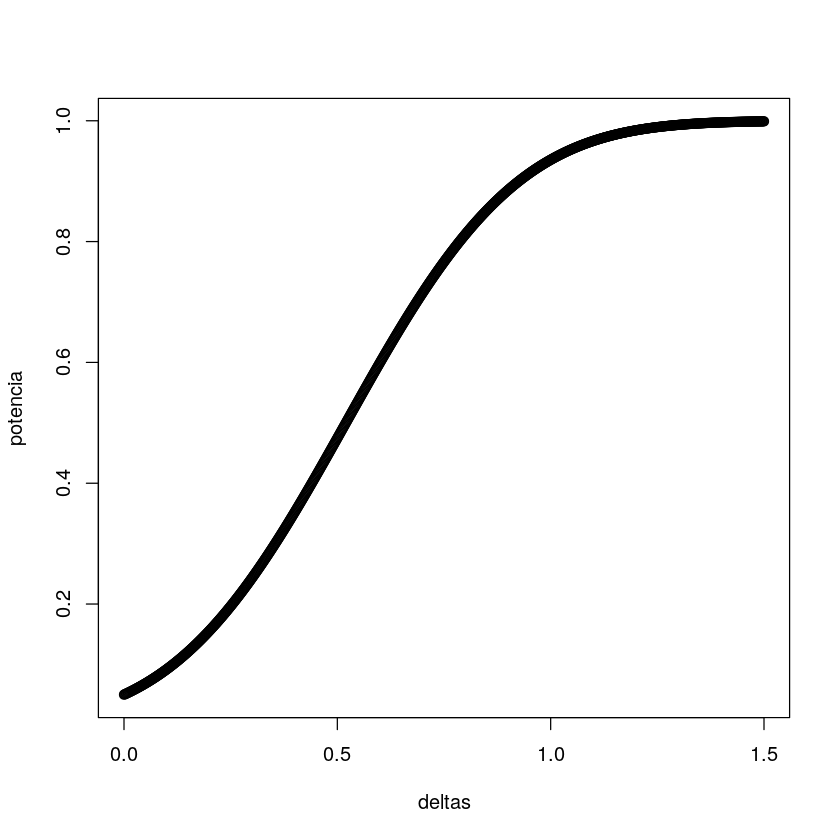

In [5]:
# c) Generalizamos para ver como cambia la potencia, haciendo variar la media
n = 10
sigma = 1
alpha = 0.05
A = 5 + qnorm(1-alpha)*sigma/sqrt(n)

deltas = seq(0,1.5,length=1000)
potencia = numeric(1000)

for (j in 1:1000){
    potencia[j] = 1-pnorm(A, mean = 5 + deltas[j], sd=sigma/sqrt(n))
}
plot(deltas, potencia)
A

In [1]:
# d) que nos devuelva cuando la potencia es mayor a 0.9
idx = which(potencia > 0.9)
delta_min = deltas[min(idx)]
delta_min

[1] 0.9264264

[1] 44


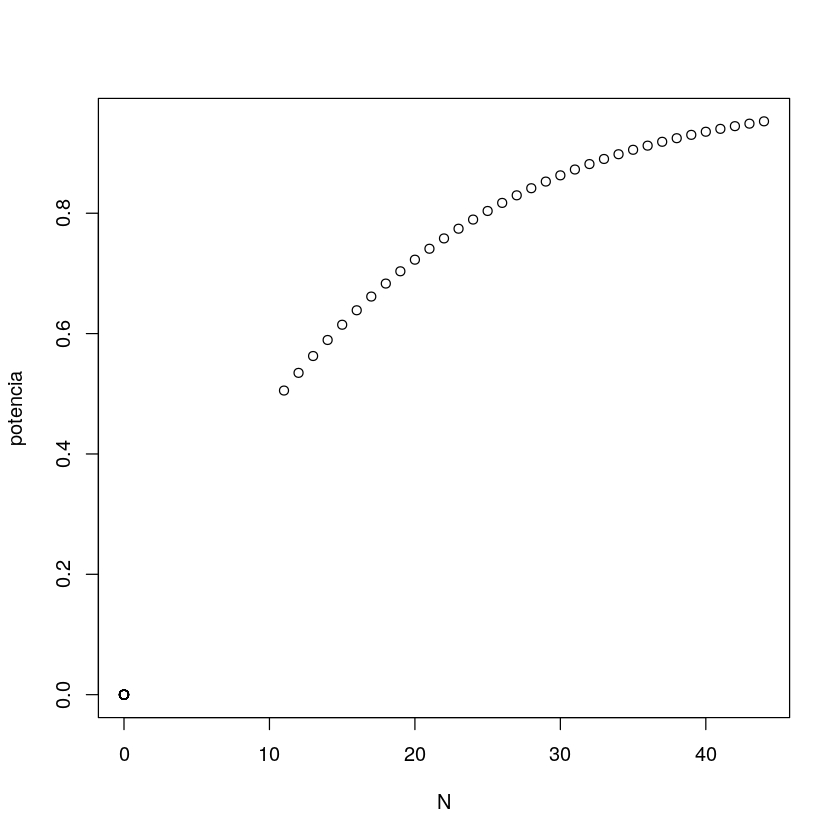

In [5]:
# e) Veamos que n necesitamos para una potencia de 0.95
pot = 0.5
sigma = 1
n = 10

N = numeric(50)
potencia = numeric(50)

while (pot < 0.95){
    n   = n + 1
    A   = 5 + qnorm(1-alpha)*sigma/sqrt(n)
    pot = 1-pnorm(A, mean = 5.5, sd=sigma/sqrt(n))
    N[n] = n
    potencia[n] = pot
}
print(n)
plot(N, potencia)

## Ejercicio 2

[1] 0.04985728
[1] 1.690207e-06


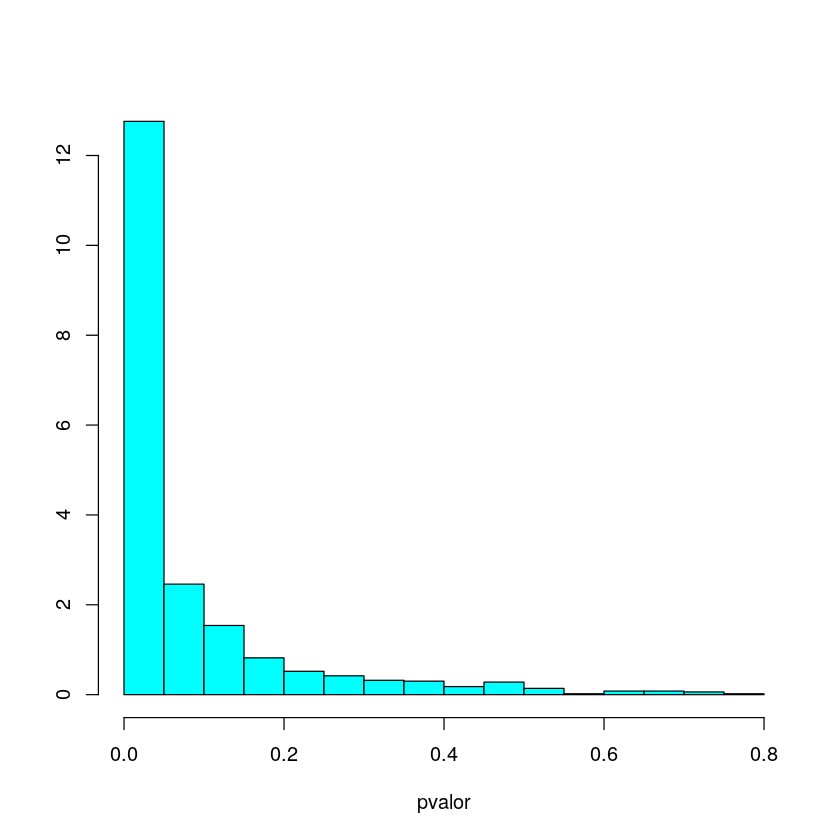

In [7]:
mu0 = 2
sigma = 1
n = 100

# generar muestra mu=2
muestra = rnorm(n, mean=mu0, sd = sigma)

# pvalor cuando mu=2.2
xbarra = mean(muestra+0.2)
pvalor = 1 - pnorm(xbarra, mean=mu0, sd=sigma/sqrt(n))
print(pvalor)

# pvalor cuando mu=2.5
xbarra = mean(muestra+0.5)
pvalor = 1 - pnorm(xbarra, mean=mu0, sd=sigma/sqrt(n))
print(pvalor)

# veamos la distribución del pvalor
nreps = 1000
pvalor = numeric(nreps)
for (rep in 1:nreps){
    muestra = rnorm(n,mean=2.2, sd=sigma)
    xbarra=mean(muestra)
    pvalor[rep] = 1-pnorm(xbarra, mean=mu0, sd=sigma/sqrt(n))
}
library(MASS)
truehist(pvalor)

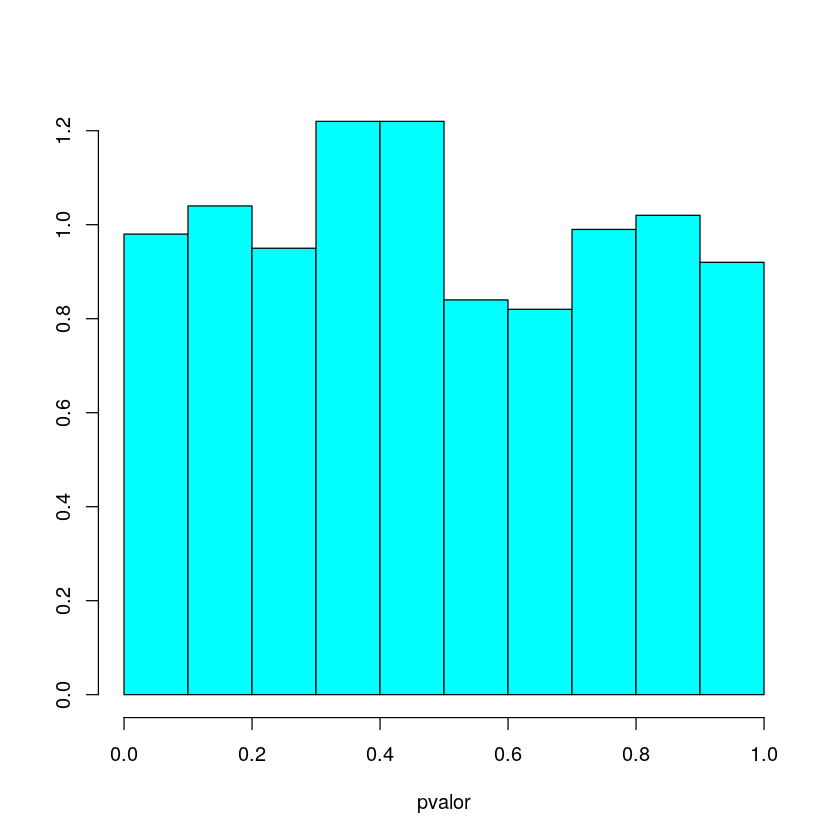

In [26]:
# si lo hago con la H0, los valores son casi uniformes, media=2
# veamos la distribución del pvalor
nreps = 1000
pvalor = numeric(nreps)
for (rep in 1:nreps){
    muestra = rnorm(n,mean=2, sd=sigma)
    xbarra=mean(muestra)
    pvalor[rep] = 1-pnorm(xbarra, mean=mu0, sd=sigma/sqrt(n))
}
library(MASS)
truehist(pvalor)

## Ejercicio 3

In [27]:
t0 = -3.12
pvalor = 2*pt(t0, 24)
pvalor

[1] 0.004658307

In [56]:
data = read.csv('/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/datos/Lock5DataTXT/BodyTemp50.txt', header = TRUE, sep = '\t')
head(data)

BodyTemp,Pulse,Gender
97.6,69,0
99.4,77,1
99.0,75,0
98.8,84,1
98.0,71,0
98.9,76,1


In [57]:
temperatura = data$BodyTemp[data$Gender==1]
#mean(temperatura)
#sd(temperatura)
#boxplot(temperatura)
t.test(temperatura, mu=98.6, alternative = "two.sided")


	One Sample t-test

data:  temperatura
t = -1.4814, df = 24, p-value = 0.1515
alternative hypothesis: true mean is not equal to 98.6
95 percent confidence interval:
 97.99691 98.69909
sample estimates:
mean of x 
   98.348 


Veo que en el rango, en el intervalo de confianza esta incluida la media, por lo que no puedo rechazar la H0.
Podría preguntarme **para que nivel de confianza debería rechazar la H0**, o sea para un intervalo mas chico que me lo deje afuera del rango.

## Ejercicio 4
Quiero comprar las medias de 2 poblaciones

In [60]:
F0 = 22^2/12^2
pval = 1-pf(F0, 15, 9)
pval*2

[1] 0.07156894

In [62]:
Sp = 18.8
xbarra1 = 290
xbarra2 = 321
n1 = 10
n2 = 16
t0 = (xbarra2-xbarra1)/(Sp*sqrt((1/n1)+(1/n2)))
t0

[1] 4.090507

## Ejercicio 6
- Lo primero que hacemos un analisis exploratorio> boxplot

In [1]:
data = read.csv('/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/datos/ebay_auctions.txt', header = TRUE, sep = '\t')
str(data)

'data.frame':	18 obs. of  2 variables:
 $ Buy.It.Now: int  235 225 225 240 250 250 210 NA NA NA ...
 $ Bidding   : int  250 249 255 234 237 240 228 255 232 246 ...


[1] "subasta"   "subasta"   "subasta"   "subasta"   "subasta"   "subasta"  
 [7] "subasta"   "subasta"   "subasta"   "subasta"   "subasta"   "subasta"  
[13] "subasta"   "subasta"   "subasta"   "subasta"   "subasta"   "subasta"  
[19] "compre_ya" "compre_ya" "compre_ya" "compre_ya" "compre_ya" "compre_ya"
[25] "compre_ya"

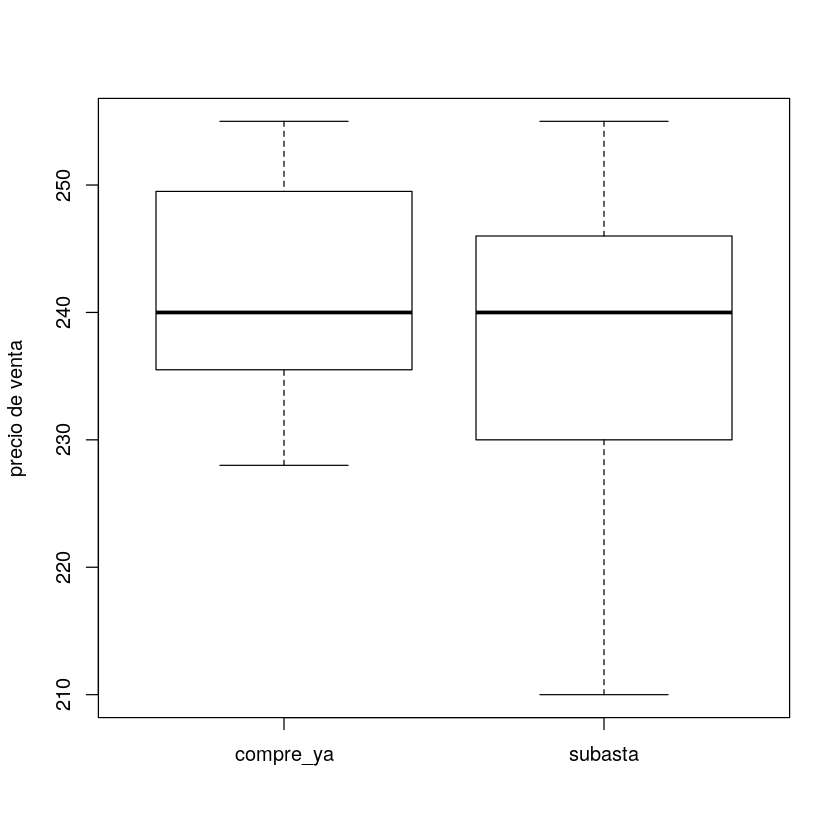

In [75]:
precio = data$Bidding
precio = c(precio, data$Bidding[1:7])
# con esto le
metodo = c(rep("subasta", 18), rep("compre_ya", 7))
metodo
boxplot(precio~metodo, ylab="precio de venta")

In [76]:
# queremos ver si hay diferencia en la varianzas
var.test(precio~metodo)

# ~ toma una variable en funcion de la otra Y ~ X


	F test to compare two variances

data:  precio by metodo
F = 0.66657, num df = 6, denom df = 17, p-value = 0.6445
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2034275 3.4807079
sample estimates:
ratio of variances 
         0.6665685 


In [77]:
# a la variable precio agrupar por metodo y a cada grupo calcular la varianza
tapply(precio, metodo, var)

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_generic(html_escape_names(obj), "%s. %s\n", "%s\n:   %s", 
 .     "**%s:** %s", "%s\n\n", item_uses_numbers = TRUE, escape_fun = html_escape)
10. html_escape_names(obj)
11. .escape_names(obj, "html")
12. colnames(obj)
ERROR while rich displaying an object: 

compre_ya   subasta 
 95.14286 142.73529

In [78]:
# divido las dos varianzas que me dio>
95.1428571428571 / 142.735294117647

[1] 0.6665685

In [79]:
# vemos a pata si nos da el mismo pvalor, se multiplica x 2 el pf()
pvalor = 2*pf(0.6665, 6,17)
pvalor

[1] 0.6443898

In [80]:
# ahora comparamos pero que use que las variables son iguales
# t.test es una comparacion de medias entre dos grupos
t.test(precio~metodo, var.equal=TRUE)
# hacer a pata estos calculos para chequear lo que nos da t.test


	Two Sample t-test

data:  precio by metodo
t = 0.66021, df = 23, p-value = 0.5157
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.161959 13.876245
sample estimates:
mean in group compre_ya   mean in group subasta 
               241.8571                238.5000 


In [ ]:
# g) ver potencia
